# Exercise 2.1.1 Reading data from a file


## Name and describe pandas data structures.
* Series - 1D
* DataFrame - 2D
* Panel - 3D
![overview]("Images/Screenshot from 2022-11-11 10-11-23.png")

Load the data from the iris.tsv file into a pandas DataFrame.

In [ ]:
import pandas as pd
import os
data_dir = "Data"

In [ ]:
data = pd.read_table(os.path.join(data_dir,"iris.tsv"))
print(f"data type after reading: {type(data)}")

print(f"Show the first 5 rows of the data: {data[:5]}\n  "
      f"Then show the last five rows of the data: {data[-5:]}")

In [ ]:
print(f"the first 10 entries of the first column of the DataFrame using the label: {data[:10]['# sepal_length:lin']}")

print(f"the first 10 entries of the first column of the DataFrame using the index: {data.iloc[:10,0]}")

In [ ]:
# Extract the Sepal.Length column and save in a variable. Whatâ€™s the type of the data in the new variable?

sl = data['# sepal_length:lin']
type(sl)

In [ ]:
# Print out the first 5 entries of the first two columns.

print(data.iloc[0:5,0:2])
print(data[['# sepal_length:lin', 'sepal_width:lin']][:5])
print(data[:5][['# sepal_length:lin', 'sepal_width:lin']])

In [ ]:
# Print out the last 5 rows for Petal.Width and Species.

print(data[-5:][['petal_width:lin','label:nom']])
# also possible:
print(data[['petal_width:lin','label:nom']].tail(n=5))

 ### Extract data for the species virginica only

In [ ]:
data_virginica = data[data['label:nom'] == 'virginica']
print(type(data_virginica))
print(data_virginica.shape)

# more elegant way:
virginica_idx = data['label:nom'] == 'virginica'
data_virginica = data[virginica_idx]
print(virginica_idx[:5])

print(type(virginica_idx))
print(data_virginica.shape)

## DataFrame and data summarization

In [ ]:
# Get the minimum, maximum, mean and median petal width.
data['petal_width:lin'].min()
data['petal_width:lin'].max()
data['petal_width:lin'].mean()
data['petal_width:lin'].median()

data.mean() # mean for all numerical columns

In [ ]:
# Get the number of entries per species.
num_p_spec = data.groupby(['label:nom'])['label:nom'].count()
print(num_p_spec)

# Plot species count as barplot.
data['label:nom'].value_counts().plot(kind = 'bar')

In [ ]:
# Get the mean petal width by species.
print(data.groupby('label:nom').mean()['petal_width:lin'])

## Filling-up a DataFrame

In [ ]:
# Create a DataFrame with three columns species, height and weight and add an entry to the end.

## use append/concat
df = pd.DataFrame(columns=('species','height','weight'))
print('empty ',df)
# add an entry to the end
tmp_df = pd.DataFrame([['H.sapiens',184,132]], columns=('species','height','weight'))
# df = df.append(tmp_df, ignore_index=True)
df = pd.concat([df,tmp_df])
print(df)
del(tmp_df)

In [ ]:
# help(pd.concat)

In [ ]:
## creating and filling by using loc

df = pd.DataFrame(columns=('species','height','weight'))
df = pd.DataFrame(columns=('species','height','weight'))
df.loc[len(df)+1] = ['H.sapiens',184,132]
df.loc[len(df)+1] = ['H.sapiens',181,72]

Create a DataFrame with the same columns and 50 empty entries. Fill-up the data frame
row by row with 50 random entries

In [ ]:
df_1 = pd.DataFrame(index=range(50), columns=('species','height','weight'))
for i in range(50):
    df_1.loc[i] = ['H.sapiens',10*i,2*i]

Update every second entry, set the species name to M.musculus

In [ ]:
df_mus = df.loc[df.index%2 != 0,'species'] = 'M.musculus'

# other possibility - but probably much more slow for big dfs
for i in range(0,50,2):
    df_1['species'][i] = 'M.musculus'

In [ ]:
# Save the DataFrame as a tsv file (tab separated values).
df.to_csv('tmp_dataframe.tsv', sep='\t', index=False)

## Doing stuff with images

Create a DataFrame with the same columns and 50 empty entries. Fill-up the data frame
row by row with 50 random entries

In [23]:
df_1 = pd.DataFrame(index=range(50), columns=('species','height','weight'))
for i in range(50):
    df_1.loc[i] = ['H.sapiens',10*i,2*i]

Update every second entry, set the species name to M.musculus

In [28]:
df_mus = df.loc[df.index%2 != 0,'species'] = 'M.musculus'

# other possibility - but probably much more slow for big dfs
for i in range(0,50,2):
    df_1['species'][i] = 'M.musculus'

In [51]:
# Save the DataFrame as a tsv file (tab separated values).
df.to_csv('tmp_dataframe.tsv', sep='\t', index=False)

## Doing stuff with images

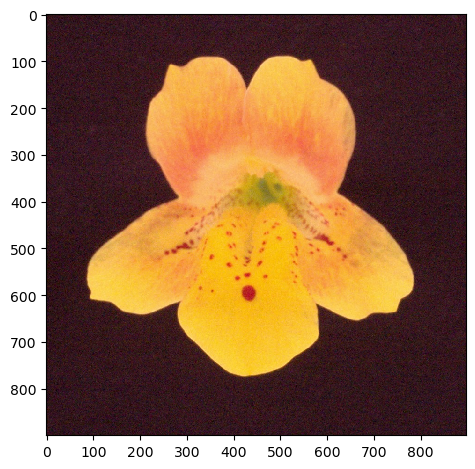

In [54]:
import skimage.io as io
im = io.imread(os.path.join(data_dir,"Mimulus-77.jpg"))
io.imshow(im)